In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
fare_data = df.loc[df['Fare'].notnull(), 'Fare'].values

### Prezentacja rozkładu wysokości opłat za bilet

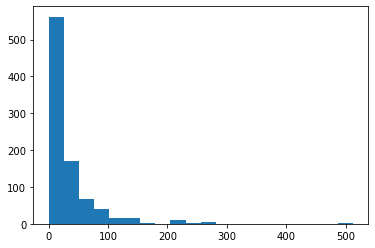

In [14]:
plt.hist(fare_data, bins=20)
plt.show()

### Obliczenie średniej opłaty

In [12]:
fare_mean = np.mean(fare_data)
fare_mean

32.204207968574636

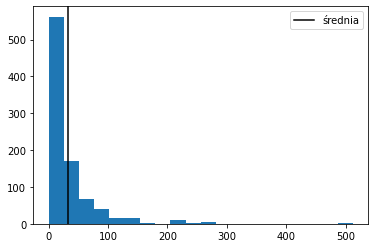

In [19]:
plt.hist(fare_data, bins=20)
plt.axvline(x=fare_mean, color='black', label="średnia")
plt.legend(loc='upper right')
plt.show()